In [3]:
import tensorflow as tf
import keras 
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")

In [4]:
from keras.preprocessing.image import ImageDataGenerator

In [5]:
train_path = 'D:\data science\crop weed cleaned dataset\Train'
test_path = 'D:\data science\crop weed cleaned dataset\Test'

In [6]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)


In [7]:
train_generator = train_datagen.flow_from_directory(train_path,
                                                    target_size=(150, 150),
                                                    batch_size=32,
                                                    class_mode='binary')

Found 18019 images belonging to 2 classes.


In [8]:
train_generator.class_indices

{'crop': 0, 'weed': 1}

In [9]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [10]:
test_generator = test_datagen.flow_from_directory(test_path,
                                                  target_size=(150, 150),
                                                  batch_size=32,
                                                  class_mode='binary')


Found 5411 images belonging to 2 classes.


In [11]:
from tensorflow.keras import layers, models
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten

In [12]:
# Define the CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [13]:
cnn_model = model.fit(train_generator,
                    steps_per_epoch=train_generator.samples // train_generator.batch_size,
                    epochs=10,  
                    validation_data=test_generator,
                    validation_steps=test_generator.samples // test_generator.batch_size)


Epoch 1/10


563/563 [==============================] - 1048s 2s/step - loss: 0.3511 - accuracy: 0.8624 - val_loss: 0.2224 - val_accuracy: 0.9340
Epoch 2/10
563/563 [==============================] - 846s 2s/step - loss: 0.2212 - accuracy: 0.9298 - val_loss: 0.1549 - val_accuracy: 0.9573
Epoch 3/10
563/563 [==============================] - 806s 1s/step - loss: 0.1797 - accuracy: 0.9459 - val_loss: 0.1679 - val_accuracy: 0.9528
Epoch 4/10
563/563 [==============================] - 591s 1s/step - loss: 0.1563 - accuracy: 0.9521 - val_loss: 0.2088 - val_accuracy: 0.9323
Epoch 5/10
563/563 [==============================] - 598s 1s/step - loss: 0.1391 - accuracy: 0.9561 - val_loss: 0.1834 - val_accuracy: 0.9503
Epoch 6/10
563/563 [==============================] - 597s 1s/step - loss: 0.1295 - accuracy: 0.9580 - val_loss: 0.1701 - val_accuracy: 0.9575
Epoch 7/10
563/563 [==============================] - 593s 1s/step - loss: 0.1170 - accuracy: 0.9597 - val_loss: 0.1694 - val_accuracy: 0.9

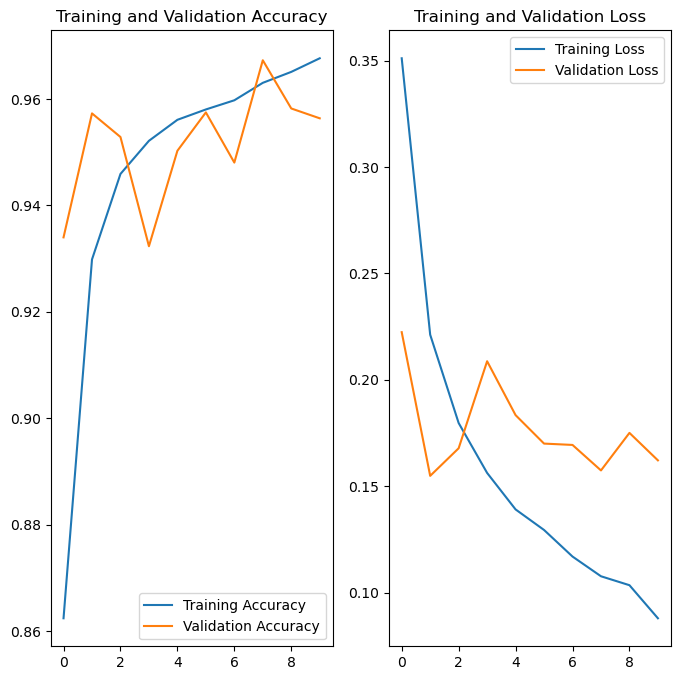

In [14]:
acc = cnn_model.history['accuracy']
val_acc = cnn_model.history['val_accuracy']
loss = cnn_model.history['loss']
val_loss = cnn_model.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()


In [17]:
from tensorflow.keras.models import load_model

# Save the model
model.save("D:/data science/crop_weed_detection_model")



INFO:tensorflow:Assets written to: D:/data science/crop_weed_detection_model\assets


INFO:tensorflow:Assets written to: D:/data science/crop_weed_detection_model\assets


In [18]:
from PIL import Image
import numpy as np

In [19]:
t_img=Image.open("D:\data science\crop weed cleaned dataset\w.jpg")
 
t_img=t_img.resize((150,150))
t_img=np.array(t_img)
t_img=np.expand_dims(t_img,axis=0)

result=model.predict(t_img)

if result[0][0]==1:
    print("weed")
else:
    print("crop")

1/1 [==============================] - 0s 485ms/step
weed


In [1]:
t_img=Image.open("D:\data science\crop weed cleaned dataset\w.jpg")
 
t_img=t_img.resize((150,150))
t_img=np.array(t_img)
t_img=np.expand_dims(t_img,axis=0)

result=model.predict(t_img)

if result[0][0]==1:
    print("weed")
else:
    print("crop")

NameError: name 'Image' is not defined

In [3]:
import numpy as np
from tensorflow.keras.models import load_model
from keras.preprocessing import image

# Load the saved model
model_path = "D:/data science/crop_weed_detection_model"
model = load_model(model_path)  

from PIL import Image
import numpy as np

t_img=Image.open("D:\data science\crop weed cleaned dataset\paddy.jpeg")
 
t_img=t_img.resize((150,150))
t_img=np.array(t_img)
t_img=np.expand_dims(t_img,axis=0)

result=model.predict(t_img)

if result[0][0]==1:
    print("weed")
else:
    print("crop")


1/1 [==============================] - 0s 317ms/step
crop


In [4]:
import numpy as np
from tensorflow.keras.models import load_model
from keras.preprocessing import image

# Load the saved model
model_path = "D:/data science/crop_weed_detection_model"
model = load_model(model_path)  

from PIL import Image
import numpy as np

t_img=Image.open("D:\data science\crop weed cleaned dataset\weed1.jpg")
 
t_img=t_img.resize((150,150))
t_img=np.array(t_img)
t_img=np.expand_dims(t_img,axis=0)

result=model.predict(t_img)

if result[0][0]==1:
    print("weed")
else:
    print("crop")

1/1 [==============================] - 0s 205ms/step
weed


In [6]:
import numpy as np
from tensorflow.keras.models import load_model
from keras.preprocessing import image


model_path = "D:/data science/crop_weed_detection_model"
model = load_model(model_path)  

from PIL import Image
import numpy as np

t_img=Image.open("D:\data science\crop weed cleaned dataset\weed2.jpeg")
 
t_img=t_img.resize((150,150))
t_img=np.array(t_img)
t_img=np.expand_dims(t_img,axis=0)

result=model.predict(t_img)

if result[0][0]==1:
    print("weed")
else:
    print("crop")

1/1 [==============================] - 0s 192ms/step
weed


In [9]:
import numpy as np
from tensorflow.keras.models import load_model
from keras.preprocessing import image


model_path = "D:/data science/crop_weed_detection_model"
model = load_model(model_path)  

from PIL import Image
import numpy as np

t_img=Image.open("D:\data science\crop weed cleaned dataset\w.jpg")
 
t_img=t_img.resize((150,150))
t_img=np.array(t_img)
t_img=np.expand_dims(t_img,axis=0)

result=model.predict(t_img)

if result[0][0]==1:
    print("weed")
else:
    print("crop")

1/1 [==============================] - 0s 198ms/step
weed
